In [1]:
# coding: utf-8
###data
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
base_x, base_y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=0, center_box=(10, 20))
#随机生成3类数据
base_n = len(base_y)
base_y=base_y.reshape((base_n,1))

#normalization 必须做归一化，不然特征取不同单位导致结果不同
base_x-=base_x.min()
base_x/=base_x.max()

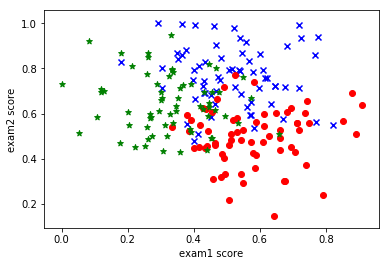

In [2]:
import matplotlib.pyplot as plt

def plotData(x,y):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    x1 = np.where(y[:,0]==0) #y为类似矩阵形式，所以要再取第一列
    x2 = np.where(y[:,0]==1)
    x3 = np.where(y[:,0]==2)
    ax1 = plt.scatter(x[x1,0], x[x1,1], marker = 'x', color = 'b')  
    ax2 = plt.scatter(x[x2,0], x[x2,1], marker = 'o', color = 'r')  
    ax3 = plt.scatter(x[x3,0], x[x3,1], marker = '*', color = 'g') 
    plt.xlabel('exam1 score') 
    plt.ylabel('exam2 score')
    
    plt.show()

plotData(base_x,base_y)

In [3]:
def normal_knn(x,k=10):
    x=np.array(x)
    L2 = (np.sum((base_x-x)**2,axis=1))**0.5 #axis=1按行相加
    #argsort函数返回的是数组值从小到大的索引值
    k_min = np.argsort(L2)[:k]  
    print(base_y.shape)
    print(base_y[k_min,0])
    k_y = base_y[k_min,0]
    k_count = np.bincount(k_y)#np.bincount(x)返回长度为x中最大元素值+1的np.ndarray，每个元素值对应相应索引值在x中出现的次数
    pre_y = np.argmax(k_count)
    return pre_y

x_test = (0.5,0.5)
print(normal_knn(x_test))

(200, 1)
[1 1 1 1 2 1 1 2 1 1]
1


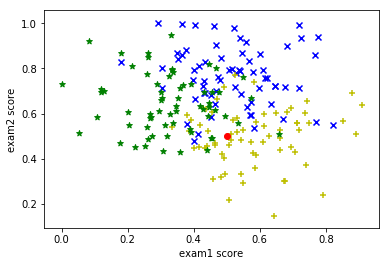

In [5]:
def plotData(x,y,x_test):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    x1 = np.where(y[:,0]==0) #y为类似矩阵形式，所以要再取第一列
    x2 = np.where(y[:,0]==1)
    x3 = np.where(y[:,0]==2)
    ax1 = plt.scatter(x[x1,0], x[x1,1], marker = 'x', color = 'b')  
    ax2 = plt.scatter(x[x2,0], x[x2,1], marker = '+', color = 'y')  
    ax3 = plt.scatter(x[x3,0], x[x3,1], marker = '*', color = 'g') 
    
    ax4 = plt.scatter(x_test[0], x_test[1], marker = 'o', color = 'r') 
    
    plt.xlabel('exam1 score') 
    plt.ylabel('exam2 score')
    
    plt.show()

plotData(base_x,base_y,x_test)